In [637]:
#Importing Libraries and Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from librarian.core import (
    annualized_volatility,
    drawdown_series,
    log_returns,
    max_drawdown,
    rolling_average_pairwise_corr,
)
from librarian.models import MarketEvent
from librarian.utils import download_price_history, slice_period

In [638]:
tickers = ['XLK', 'XLV', 'XLF', 'XLE', 'XLP', 'XLI', 'XLC', 'XLB', 'XLU', 'XLRE', 'XLY']
start_date = pd.Timestamp('2015-01-01')
end_date = pd.Timestamp('2025-01-01')

# Event Windows
covid_event = MarketEvent('COVID', pd.Timestamp('2020-01-10'), pd.Timestamp('2023-05-05'))
war_event = MarketEvent('Guerra Ucraina', pd.Timestamp('2022-02-24'), pd.Timestamp.today().normalize())

covid_start, covid_end = covid_event.start, covid_event.end
war_start, war_end = war_event.start, war_event.end
event_windows = [covid_event, war_event]


In [639]:
war_end

Timestamp('2025-11-28 00:00:00')

In [640]:
px = download_price_history(tickers=tickers, start=start_date, end=end_date)


In [641]:
px.head()

Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2015-01-02,39.191769,NaN,51.868378,16.415619,46.499966,36.268452,36.356628,NaN,33.502556,57.536366,63.526054
2015-01-05,38.192833,NaN,49.722687,16.070442,45.413795,35.714806,36.100971,NaN,33.092934,57.242977,62.311047
2015-01-06,37.854492,NaN,48.992233,15.824846,44.854252,35.284187,36.055855,NaN,33.114132,57.050125,61.690258
2015-01-07,38.281456,NaN,49.096584,15.990790,45.191624,35.582985,36.672436,NaN,33.438972,58.391502,62.665775
2015-01-08,39.191769,NaN,50.198792,16.229759,46.096764,36.365108,37.228889,NaN,33.672028,59.389168,63.605843


In [642]:
px.describe().T

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
XLB,2516.0,59.137471,17.473722,30.680195,44.383560,51.906424,76.450745,95.718559
XLC,1645.0,61.221009,14.601090,36.583897,47.990513,57.794487,73.360680,100.996223
XLE,2516.0,54.655024,17.164137,18.770018,44.653531,48.535131,68.626497,94.138588
XLF,2516.0,26.703847,8.362010,13.303342,20.331672,24.509871,33.301531,50.596439
XLI,2516.0,76.377624,24.316451,40.343166,57.254929,69.765079,95.527592,141.811066
XLK,2516.0,102.053475,57.094835,33.416386,51.764182,82.504707,144.881359,239.916092
XLP,2516.0,54.281752,12.882118,34.788700,43.199556,51.617266,66.916252,81.621284
XLRE,2323.0,30.976934,6.471004,19.510748,24.740702,30.846727,36.161346,45.638687
XLU,2516.0,50.067393,12.342803,29.419250,39.334439,50.495169,59.933629,80.563507


In [643]:
px.tail()

Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2024-12-24,84.292786,98.295143,82.602394,48.486374,132.794678,239.403458,77.948151,39.882523,74.913109,137.494888,232.919464
2024-12-26,84.164665,98.166298,82.534081,48.605137,132.893661,239.562714,78.193459,39.941154,74.736794,137.771225,232.055237
2024-12-27,83.711327,97.294060,82.524315,48.248840,131.903824,236.377701,77.810791,39.618652,74.521301,137.129730,228.220749
2024-12-30,82.587814,96.273148,82.514565,47.783669,130.577454,233.371857,76.898247,39.432976,74.207863,135.442139,224.555161
2024-12-31,82.922890,95.955963,83.597847,47.833160,130.419098,231.430984,77.133743,39.745697,74.139290,135.767807,222.866394


In [644]:
px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-01-02 to 2024-12-31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   XLB     2516 non-null   float64
 1   XLC     1645 non-null   float64
 2   XLE     2516 non-null   float64
 3   XLF     2516 non-null   float64
 4   XLI     2516 non-null   float64
 5   XLK     2516 non-null   float64
 6   XLP     2516 non-null   float64
 7   XLRE    2323 non-null   float64
 8   XLU     2516 non-null   float64
 9   XLV     2516 non-null   float64
 10  XLY     2516 non-null   float64
dtypes: float64(11)
memory usage: 235.9 KB


In [645]:
# px already prepared via download_price_history

In [646]:
# log_returns imported from librarian.core

In [647]:
rets = log_returns(px)

In [648]:
rets.head()

Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2015-01-05,-0.025819,NaN,-0.042248,-0.021252,-0.023636,-0.015383,-0.007057,NaN,-0.012302,-0.005112,-0.019311
2015-01-06,-0.008898,NaN,-0.014800,-0.015400,-0.012398,-0.012130,-0.001251,NaN,0.000640,-0.003375,-0.010013
2015-01-07,0.011216,NaN,0.002128,0.010432,0.007493,0.008433,0.016956,NaN,0.009762,0.023240,0.015689
2015-01-08,0.023501,NaN,0.022201,0.014834,0.019831,0.021742,0.015060,NaN,0.006945,0.016941,0.014890
2015-01-09,-0.005152,NaN,-0.007957,-0.013589,-0.010768,-0.003146,-0.008112,NaN,-0.006312,-0.008934,-0.011640


In [649]:
# annualized_volatility imported from librarian.core

In [650]:
vol = annualized_volatility(rets)
print(vol)

Ticker
XLB     0.206549
XLC     0.231745
XLE     0.299811
XLF     0.222471
XLI     0.196937
XLK     0.233544
XLP     0.146656
XLRE    0.210086
XLU     0.192770
XLV     0.167777
XLY     0.213112
dtype: float64


In [651]:
# drawdown_series imported from librarian.core

In [652]:
dd = drawdown_series(px)

In [653]:
dd.head()

Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2015-01-02,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
2015-01-05,-0.025488,NaN,-0.041368,-0.021027,-0.023359,-0.015265,-0.007032,NaN,-0.012227,-0.005099,-0.019126
2015-01-06,-0.034121,NaN,-0.055451,-0.035988,-0.035392,-0.027138,-0.008273,NaN,-0.011594,-0.008451,-0.028898
2015-01-07,-0.023227,NaN,-0.053439,-0.025880,-0.028136,-0.018900,0.000000,NaN,-0.001898,0.000000,-0.013542
2015-01-08,0.000000,NaN,-0.032189,-0.011322,-0.008671,0.000000,0.000000,NaN,0.000000,0.000000,0.000000


In [654]:
# max_drawdown imported from librarian.core

In [655]:
max_dd = max_drawdown(px)
print(max_dd)

Ticker
XLB    -0.372742
XLC    -0.466536
XLE    -0.668131
XLF    -0.428625
XLI    -0.423341
XLK    -0.335591
XLP    -0.245122
XLRE   -0.388248
XLU    -0.360667
XLV    -0.284043
XLY    -0.396696
dtype: float64


In [656]:
# rolling_average_pairwise_corr imported from librarian.core

In [657]:
# Financial Indicators

returns = log_returns(px)
vol_ann = annualized_volatility(returns)
dd_series = drawdown_series(px)
dd_max = max_drawdown(px)
msi_full = rolling_average_pairwise_corr(returns, window=63)

In [658]:
# Data Alignment Error Prevention

assert dd_series.columns.equals(returns.columns)
assert vol_ann.index.equals(returns.columns)

In [659]:
# Creation of a pandas DataFrame with annualized volatility and drawdown

risk_snapshot = pd.DataFrame({
    "annualized_vol": vol_ann,
    "max_drawdown": dd_max,
})

risk_snapshot.sort_values("annualized_vol", ascending=False).head()

msi_full.sort_index(ascending=False).head().to_frame("market_shift_index")

dd_series.head()

returns.head()

Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2015-01-05,-0.025819,NaN,-0.042248,-0.021252,-0.023636,-0.015383,-0.007057,NaN,-0.012302,-0.005112,-0.019311
2015-01-06,-0.008898,NaN,-0.014800,-0.015400,-0.012398,-0.012130,-0.001251,NaN,0.000640,-0.003375,-0.010013
2015-01-07,0.011216,NaN,0.002128,0.010432,0.007493,0.008433,0.016956,NaN,0.009762,0.023240,0.015689
2015-01-08,0.023501,NaN,0.022201,0.014834,0.019831,0.021742,0.015060,NaN,0.006945,0.016941,0.014890
2015-01-09,-0.005152,NaN,-0.007957,-0.013589,-0.010768,-0.003146,-0.008112,NaN,-0.006312,-0.008934,-0.011640


In [660]:
# slice_period imported from librarian.utils

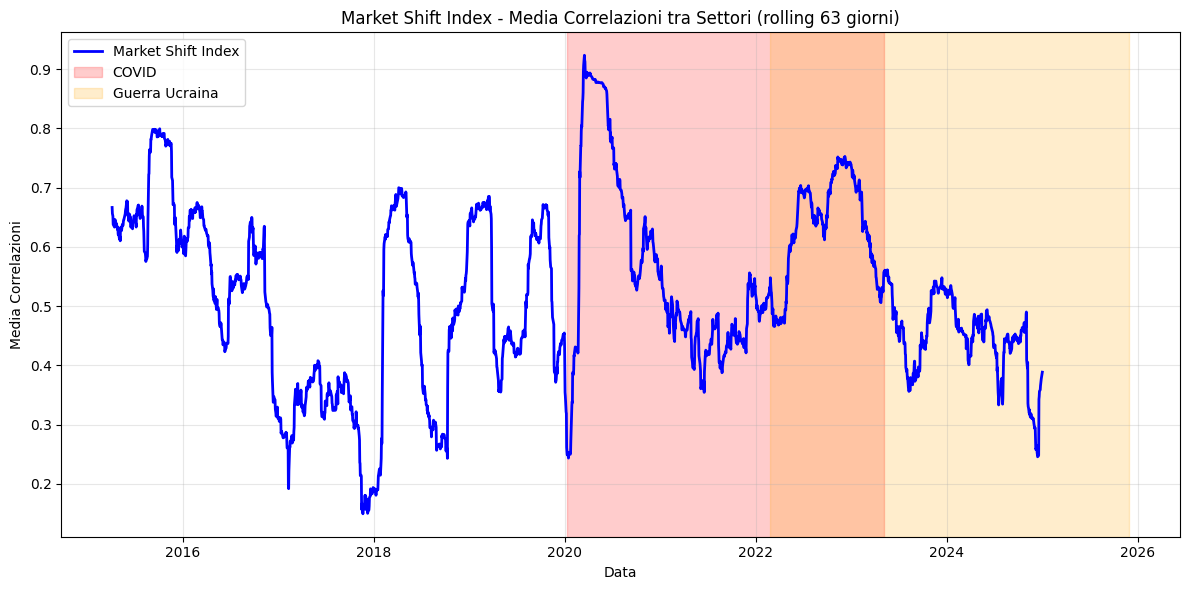

In [661]:
# Market Shift Index Plot
plt.figure(figsize=(12, 6))
plt.plot(msi_full, label="Market Shift Index", linewidth=2, color='blue')
plt.axvspan(covid_start, covid_end, alpha=0.2, color='red', label="COVID")
plt.axvspan(war_start, war_end, alpha=0.2, color='orange', label="Guerra Ucraina")
plt.title("Market Shift Index - Media Correlazioni tra Settori (rolling 63 giorni)")
plt.xlabel("Data")
plt.ylabel("Media Correlazioni")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

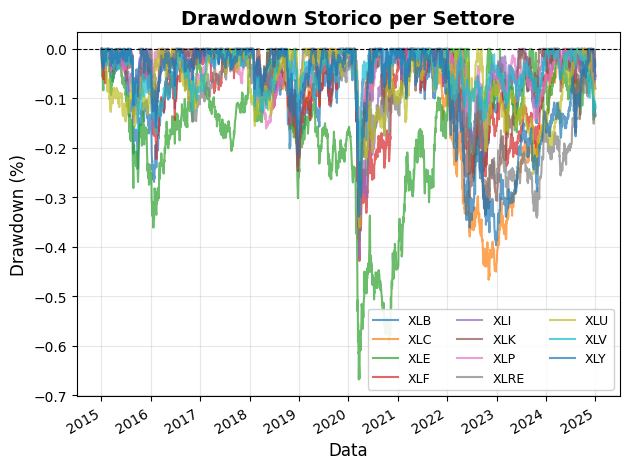

In [662]:
# Drawdown Plot - Historical drawdown for each sector
plt.figure(figsize=(12, 7))
dd_series.plot(alpha=0.7, linewidth=1.5)
plt.title("Drawdown Storico per Settore", fontsize=14, fontweight='bold')
plt.xlabel("Data", fontsize=12)
plt.ylabel("Drawdown (%)", fontsize=12)
plt.legend(ncol=3, fontsize=9, loc='lower right', framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

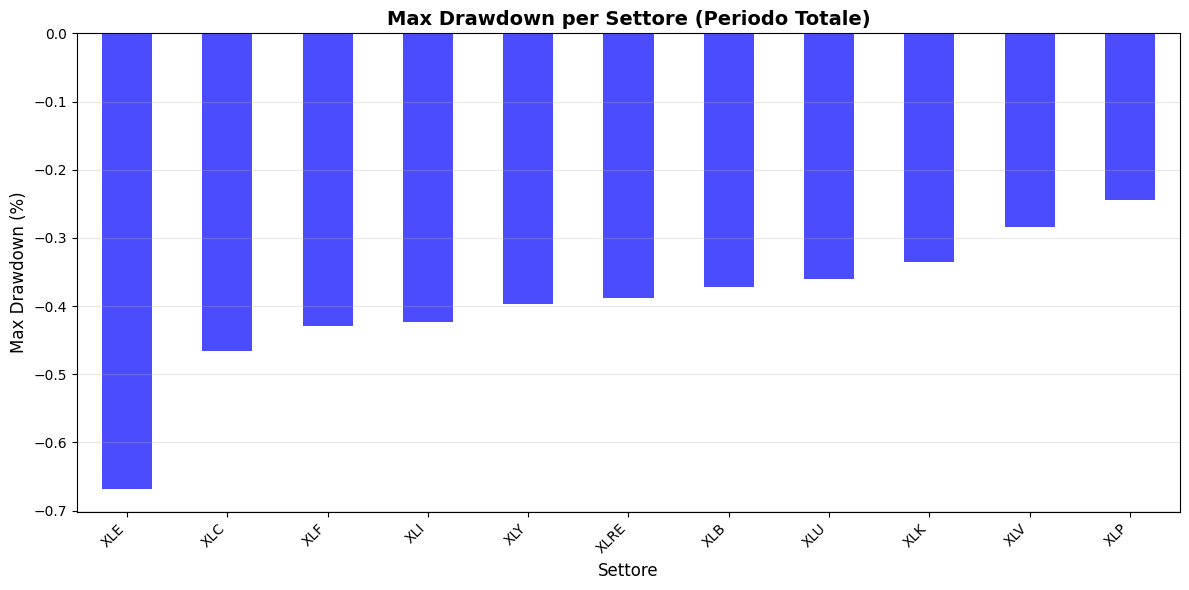

In [663]:
# Max Drawdown Plot - Maximum drawdown for each sector
plt.figure(figsize=(12, 6))
dd_max.sort_values().plot(kind='bar', color='blue', alpha=0.7)
plt.title("Max Drawdown per Settore (Periodo Totale)", fontsize=14, fontweight='bold')
plt.xlabel("Settore", fontsize=12)
plt.ylabel("Max Drawdown (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [664]:
# COVID PERIOD - DATA PREPARATION

prices_covid = slice_period(px, covid_start, covid_end)
returns_covid = returns.loc[covid_start:covid_end].copy()
msi_covid = rolling_average_pairwise_corr(returns_covid, window=63)
dd_covid = max_drawdown(prices_covid)
vol_covid = annualized_volatility(returns_covid)

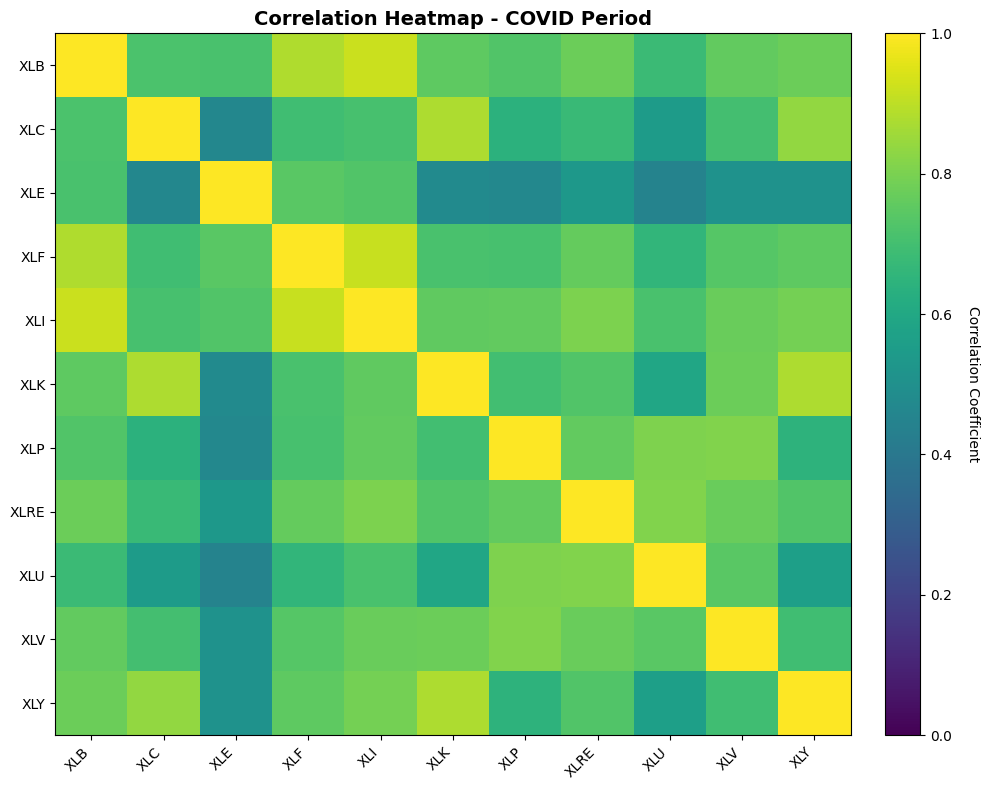

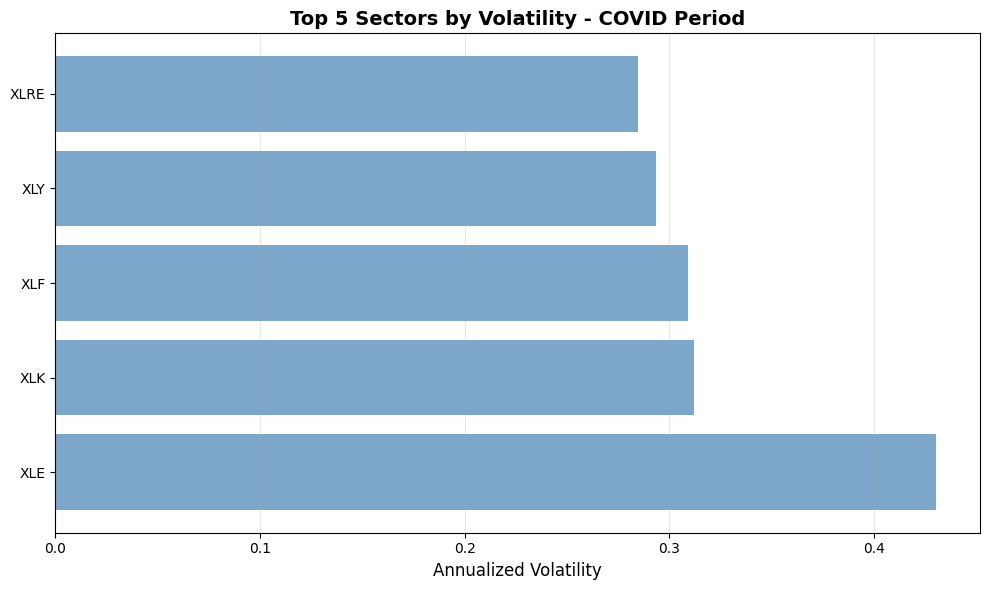

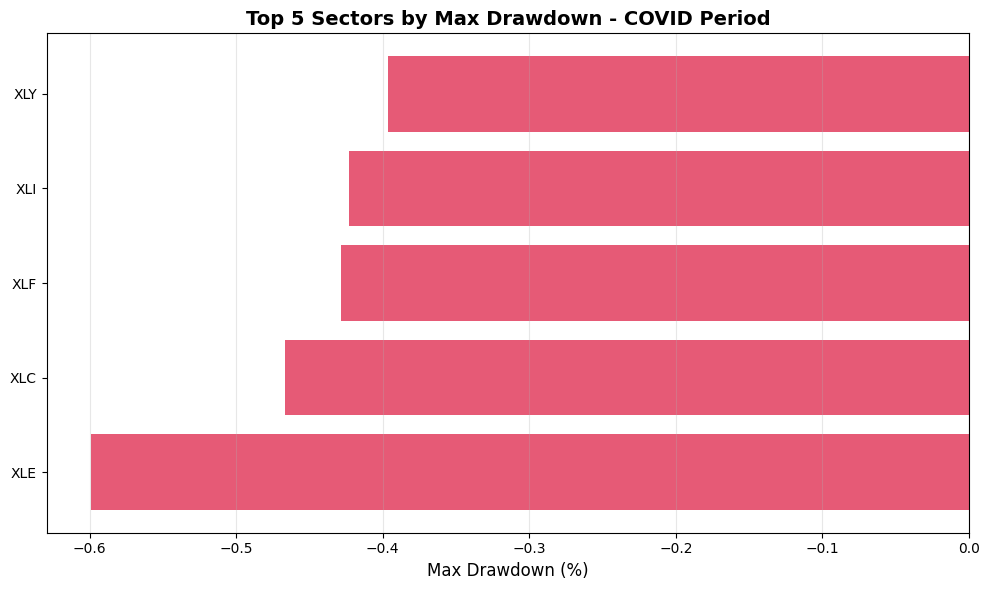

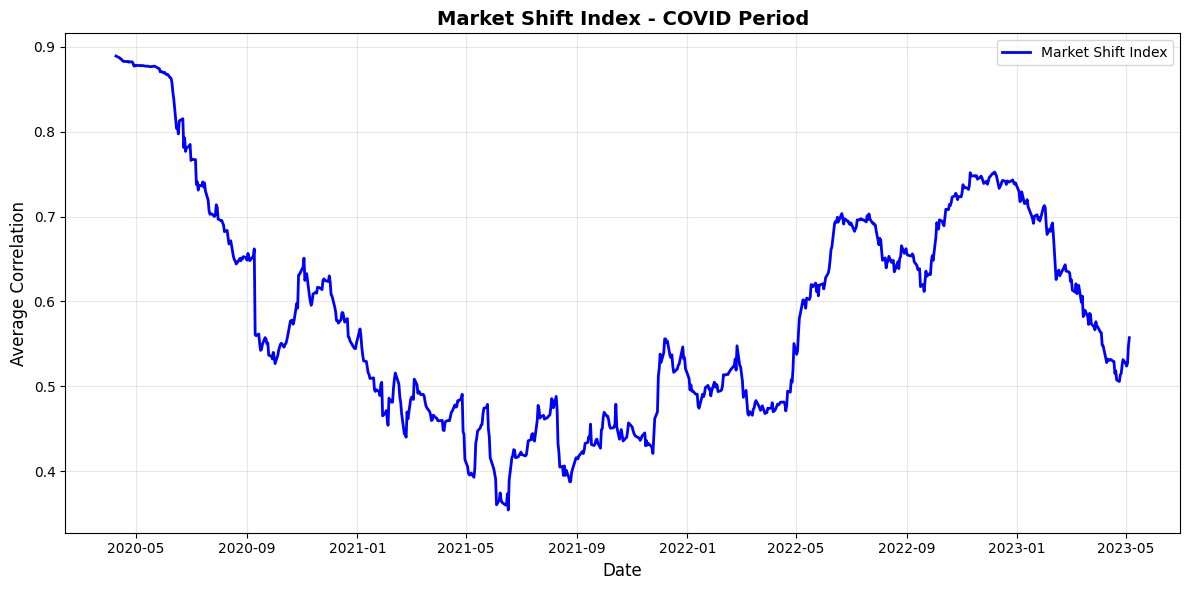

In [665]:
# COVID PERIOD - VISUALIZATION

# 1. Correlation Heatmap
corr_covid = returns_covid.corr()
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr_covid.values, cmap='viridis', vmin=0, vmax=1, aspect='auto')
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=20)
ax.set_xticks(range(len(corr_covid.columns)))
ax.set_xticklabels(corr_covid.columns, rotation=45, ha='right')
ax.set_yticks(range(len(corr_covid.index)))
ax.set_yticklabels(corr_covid.index)
ax.set_title("Correlation Heatmap - COVID Period", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Volatility Comparison (Top 5)
fig, ax = plt.subplots(figsize=(10, 6))
vol_covid_sorted = vol_covid.sort_values(ascending=False).head()
ax.barh(vol_covid_sorted.index, vol_covid_sorted.values, color='steelblue', alpha=0.7)
ax.set_xlabel('Annualized Volatility', fontsize=12)
ax.set_title('Top 5 Sectors by Volatility - COVID Period', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# 3. Max Drawdown Comparison (Top 5)
fig, ax = plt.subplots(figsize=(10, 6))
dd_covid_sorted = dd_covid.sort_values().head()
ax.barh(dd_covid_sorted.index, dd_covid_sorted.values, color='crimson', alpha=0.7)
ax.set_xlabel('Max Drawdown (%)', fontsize=12)
ax.set_title('Top 5 Sectors by Max Drawdown - COVID Period', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# 4. Market Shift Index Time Series
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(msi_covid.index, msi_covid.values, linewidth=2, color='blue', label='Market Shift Index')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Average Correlation', fontsize=12)
ax.set_title('Market Shift Index - COVID Period', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [666]:
# WAR PERIOD - DATA PREPARATION

prices_war = slice_period(px, war_start, war_end)
returns_war = log_returns(prices_war)
msi_war = rolling_average_pairwise_corr(returns_war, window=63)
dd_war = max_drawdown(prices_war)
vol_war = annualized_volatility(returns_war)

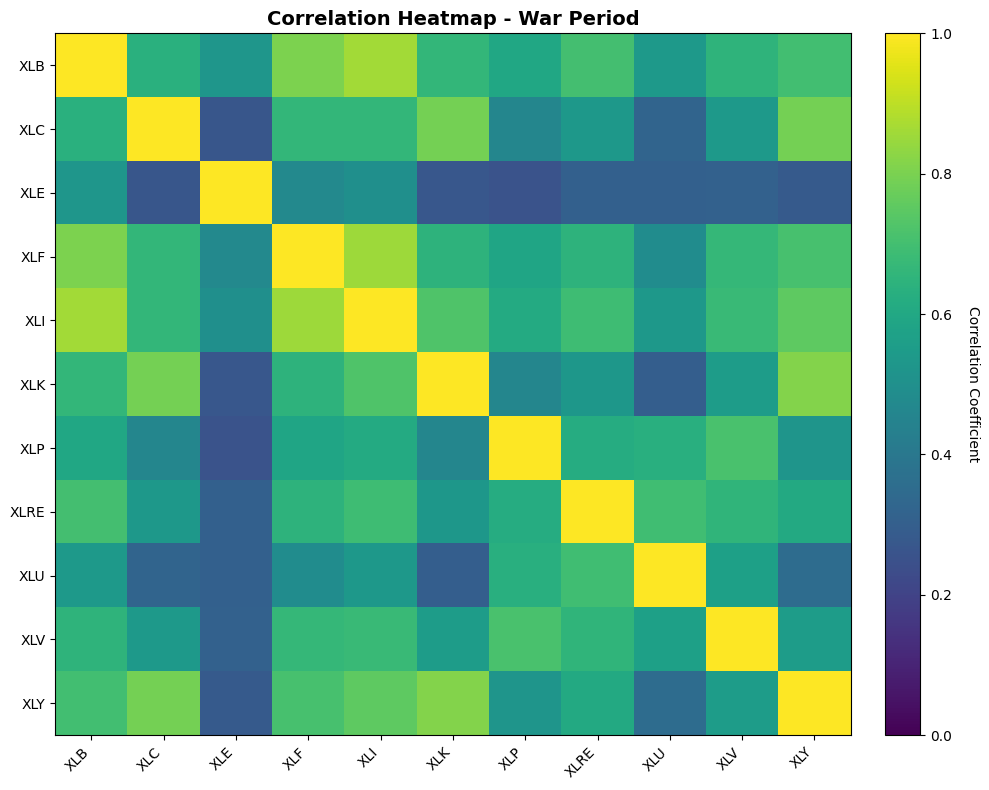

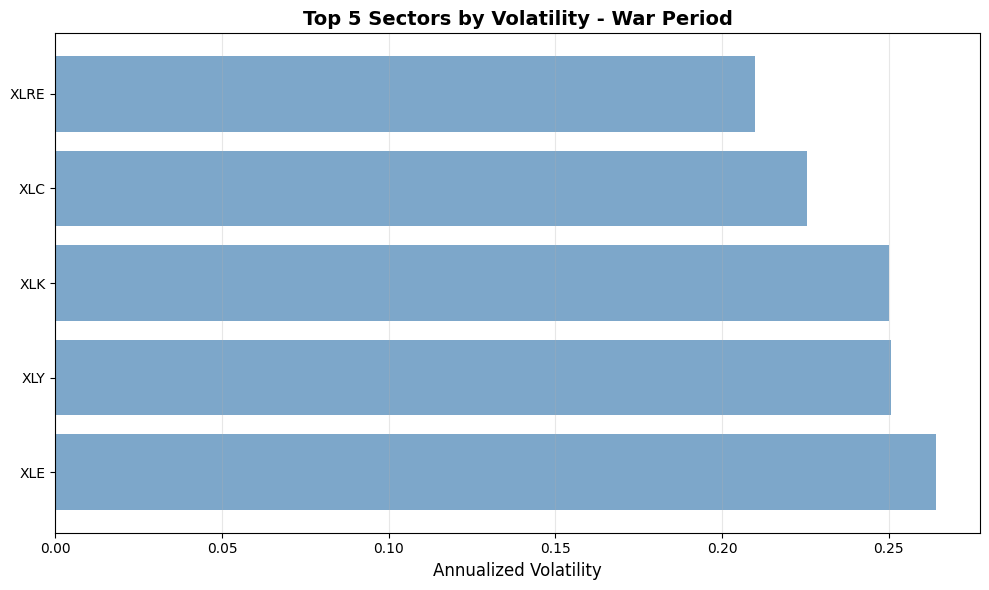

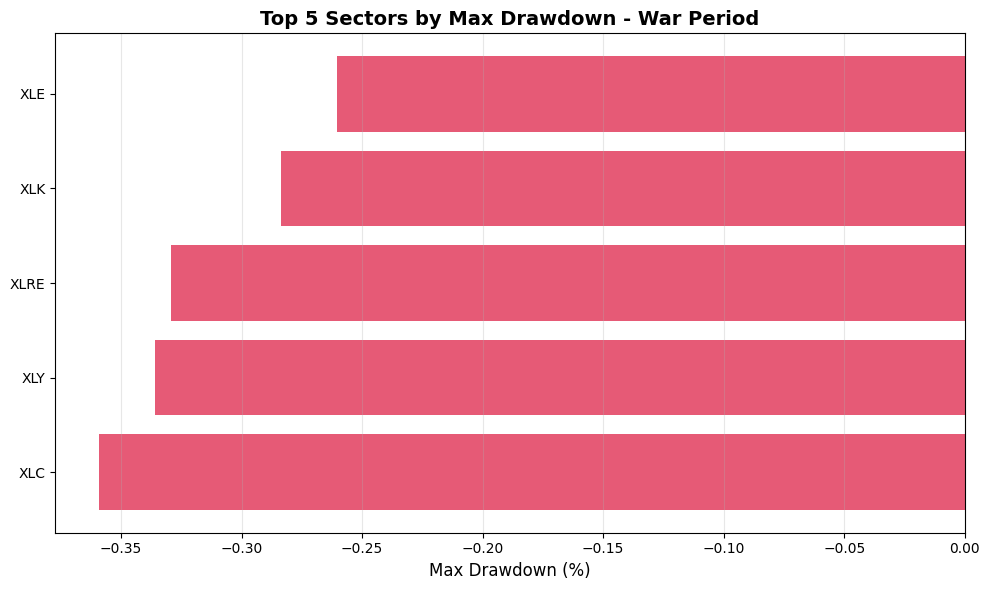

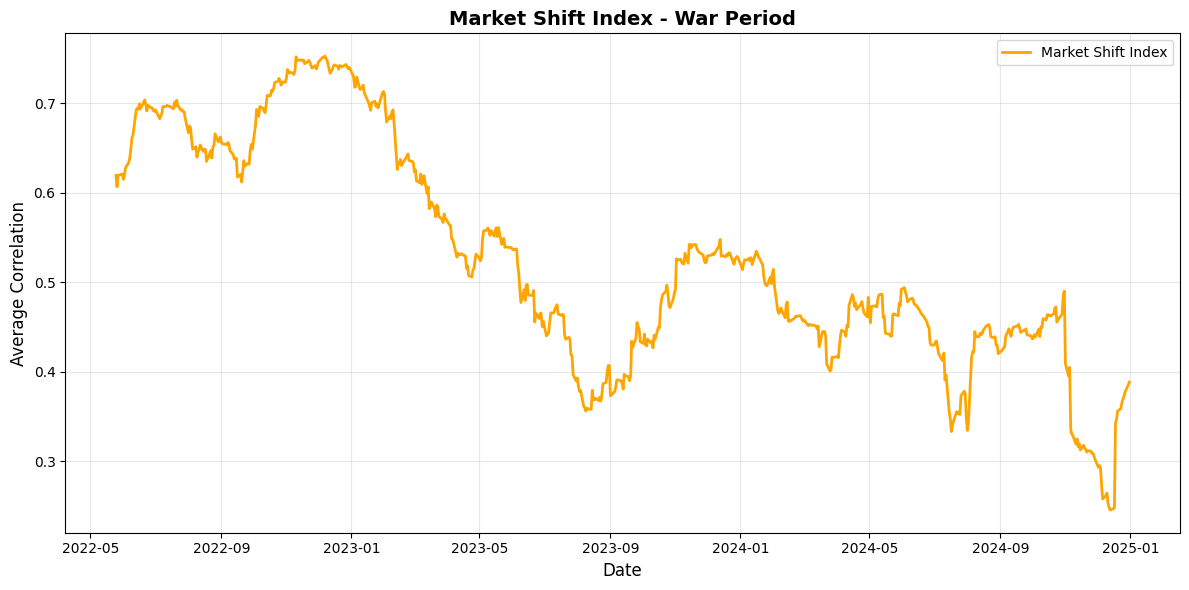

In [667]:
# WAR PERIOD - VISUALIZATION

# 1. Correlation Heatmap
corr_war = returns_war.corr()
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr_war.values, cmap='viridis', vmin=0, vmax=1, aspect='auto')
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=20)
ax.set_xticks(range(len(corr_war.columns)))
ax.set_xticklabels(corr_war.columns, rotation=45, ha='right')
ax.set_yticks(range(len(corr_war.index)))
ax.set_yticklabels(corr_war.index)
ax.set_title("Correlation Heatmap - War Period", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Volatility Comparison (Top 5)
fig, ax = plt.subplots(figsize=(10, 6))
vol_war_sorted = vol_war.sort_values(ascending=False).head()
ax.barh(vol_war_sorted.index, vol_war_sorted.values, color='steelblue', alpha=0.7)
ax.set_xlabel('Annualized Volatility', fontsize=12)
ax.set_title('Top 5 Sectors by Volatility - War Period', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# 3. Max Drawdown Comparison (Top 5)
fig, ax = plt.subplots(figsize=(10, 6))
dd_war_sorted = dd_war.sort_values().head()
ax.barh(dd_war_sorted.index, dd_war_sorted.values, color='crimson', alpha=0.7)
ax.set_xlabel('Max Drawdown (%)', fontsize=12)
ax.set_title('Top 5 Sectors by Max Drawdown - War Period', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# 4. Market Shift Index Time Series
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(msi_war.index, msi_war.values, linewidth=2, color='orange', label='Market Shift Index')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Average Correlation', fontsize=12)
ax.set_title('Market Shift Index - War Period', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()